In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from tf_vgg import kaggle_data
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import random
from math import exp
from itertools import izip, islice
import matplotlib.pyplot as plt

import xgboost as xgb


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(60, 224, 224)
0


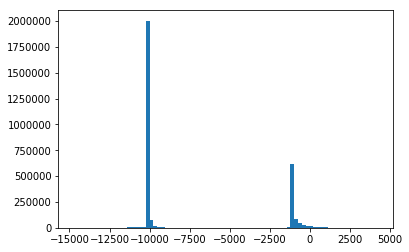

In [2]:
lungs = kaggle_data.get_training_lungs()
features = kaggle_data.get_training_lungs()
#features = kaggle_data.get_training_vgg19_features()
labels = kaggle_data.get_training_lung_labels()

for (tup, name),label in izip(features, labels):
    print tup.shape
    print label
    plt.hist(tup.flatten(), bins=80)
    plt.show()
    break

In [ ]:
param = {
    'objective': 'binary:logistic',
    'max_depth': 10,
    'eval_metric': ['error', 'auc', 'logloss']
}

def strip_names(iterator):
    for i, name in iterator:
        yield i
        
# hacky but it works
data_len = 1396
        
#features_np = np.empty((data_len, 60, 7, 7, 512), dtype=np.float32)
features_np = np.empty((data_len, 60, 224, 224), dtype=np.float32)
labels_np = np.empty((data_len,), dtype=np.int32)
for i, lung_features in enumerate(strip_names(features)):
    features_np[i] = lung_features
for i, label in enumerate(labels):
    labels_np[i] = label
print features_np.shape
features_np = features_np.reshape(features_np.shape[0], reduce(lambda a,b: a*b, features_np.shape[1:]))

dtrain = xgb.DMatrix(features_np[:350], label=labels_np[:500])
dvalidate = xgb.DMatrix(features_np[350:425], label=labels_np[500:600])

(1396, 60, 224, 224)


In [4]:
num_round = 10

evallist = [(dvalidate, 'eval'), (dtrain, 'train')]

bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-error:0.3	eval-auc:0.503953	eval-logloss:0.626157	train-error:0.06	train-auc:0.897204	train-logloss:0.506373
[1]	eval-error:0.35	eval-auc:0.509317	eval-logloss:0.604985	train-error:0.04	train-auc:0.994298	train-logloss:0.388149
[2]	eval-error:0.3	eval-auc:0.523151	eval-logloss:0.595263	train-error:0.01	train-auc:0.99989	train-logloss:0.295102
[3]	eval-error:0.28	eval-auc:0.49633	eval-logloss:0.599038	train-error:0.004	train-auc:1	train-logloss:0.227834
[4]	eval-error:0.28	eval-auc:0.47572	eval-logloss:0.610816	train-error:0	train-auc:1	train-logloss:0.177607
[5]	eval-error:0.27	eval-auc:0.45991	eval-logloss:0.612974	train-error:0	train-auc:1	train-logloss:0.14021
[6]	eval-error:0.26	eval-auc:0.45511	eval-logloss:0.622946	train-error:0	train-auc:1	train-logloss:0.114107
[7]	eval-error:0.27	eval-auc:0.460757	eval-logloss:0.638755	train-error:0	train-auc:1	train-logloss:0.093981
[8]	eval-error:0.27	eval-auc:0.47092	eval-logloss:0.648083	train-error:0	train-auc:1	train-logloss:0.0